In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

apw_all_domains_morning = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-all-domains-30-days.csv')
apw_all_domains_evening = pd.read_csv('dataset-20220714-2312/all-participating-websites/apw-all-domains-30-days.csv')

### Inital Questions: 

3. Which web pages do users stay on the longest? ((Avg_Session Duration)

    -Sort both morning and evening by avg session duration, will look at top 10


4. Which web pages keep users browsing the most? (Page Views Per Session) 
    
    -Sort both morning and evening by pahge views per session, will look at top 10

In [9]:
#Morning Table
apw_all_domains_morning.head()

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,tools.usps.com,201565684,297186721,70361109,1.474391,110.546552,204107702
1,ncbi.nlm.nih.gov,116357808,208858667,67275495,1.794969,167.491075,115085228
2,pubmed.ncbi.nlm.nih.gov,87724756,301764867,44898510,3.439905,260.896629,89382253
3,cdc.gov,75578687,124580875,54653386,1.648360,87.112481,75415294
4,reg.usps.com,64582652,90505580,21153109,1.401392,44.441142,58070499


In [10]:
#Evening Table
apw_all_domains_evening.head()

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,tools.usps.com,201072305,295865197,70237349,1.471437,109.541972,203642693
1,ncbi.nlm.nih.gov,116748160,209338761,67852582,1.793080,168.031555,115411054
2,pubmed.ncbi.nlm.nih.gov,88250515,303772995,45065164,3.442167,261.364237,89987179
3,cdc.gov,75585770,124648092,54524003,1.649095,87.500104,75436328
4,reg.usps.com,64530269,90534606,21225365,1.402979,45.223856,58016207


In [72]:
#sorting both DFs by avg session duration
#top10_domains_visits = apw_all_domains_df.sort_values(by=['visits'], ascending=False)[['domain', 'visits']].iloc[0:10]

morning_duration = apw_all_domains_morning.sort_values(by=['avg_session_duration'], ascending=False)[['domain', 'avg_session_duration']].iloc[0:10]
evening_duration = apw_all_domains_evening.sort_values(by=['avg_session_duration'], ascending=False)[['domain', 'avg_session_duration']].iloc[0:10]

avg_page_views_m =  apw_all_domains_morning.sort_values(by=['pageviews_per_session'], ascending=False)[['domain', 'pageviews_per_session']].iloc[0:10]
avg_page_views_e = apw_all_domains_evening.sort_values(by=['pageviews_per_session'], ascending=False)[['domain', 'pageviews_per_session']].iloc[0:10]


## Data Cleansing and Sanity Checks

In [73]:
#check the shape of each
print(morning_duration.shape)
print(evening_duration.shape)
print(avg_page_views_m.shape)
print(avg_page_views_e.shape)

(10, 2)
(10, 2)
(10, 2)
(10, 2)


In [74]:
#check the columns of each
print(morning_duration.columns)
print(evening_duration.columns)
print(avg_page_views_m.columns)
print(avg_page_views_e.columns)


Index(['domain', 'avg_session_duration'], dtype='object')
Index(['domain', 'avg_session_duration'], dtype='object')
Index(['domain', 'pageviews_per_session'], dtype='object')
Index(['domain', 'pageviews_per_session'], dtype='object')


In [55]:
#check the types of each
print(morning_duration.dtypes)
print(evening_duration.dtypes)
print(avg_page_views_m.dtypes)
print(avg_page_views_e.dtypes)



domain                   object
avg_session_duration    float64
dtype: object
domain                   object
avg_session_duration    float64
dtype: object
domain                    object
pageviews_per_session    float64
dtype: object
domain                    object
pageviews_per_session    float64
dtype: object


In [58]:
#check the nulls for each 
print(morning_duration.isnull().sum(),"\n")
print(evening_duration.isnull().sum(),"\n")
print(avg_page_views_m.isnull().sum(),"\n")
print(avg_page_views_e.isnull().sum(),"\n")

domain                  0
avg_session_duration    0
dtype: int64 

domain                  0
avg_session_duration    0
dtype: int64 

domain                   0
pageviews_per_session    0
dtype: int64 

domain                   0
pageviews_per_session    0
dtype: int64 



In [64]:
#make sure each DF has unique domain names, should be no duplicates, 10 unique, 10 rows from shape above match
print(morning_duration.domain.nunique(),"\n")
print(evening_duration.domain.nunique(),"\n")
print(avg_page_views_m.domain.nunique(),"\n")
print(avg_page_views_e.domain.nunique(),"\n")

10 

10 

10 

10 



## Visualizations: 

Text(0.5, 0, 'Average Page Views Per Session')

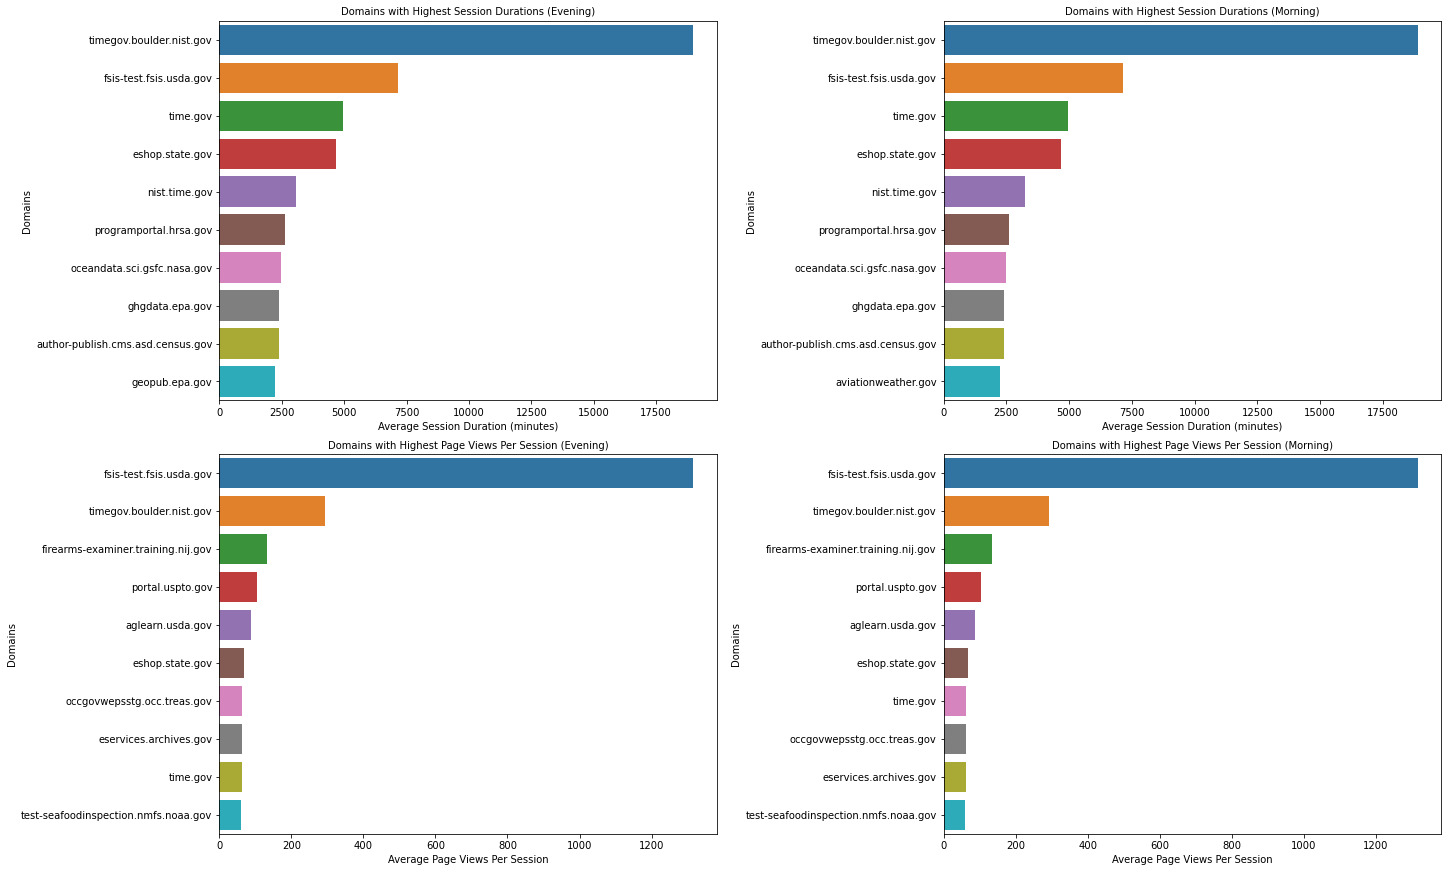

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12),constrained_layout = True)
#fig.tight_layout()
#plt.subplot_tool()

sns.barplot(x='avg_session_duration', y='domain', data=evening_duration, ax = ax[0][0])
ax[0][0].set_title("Domains with Highest Session Durations (Evening)", fontdict={'fontsize':10})
ax[0][0].set_ylabel("Domains", fontdict={'fontsize':10})
ax[0][0].set_xlabel("Average Session Duration (minutes)", fontdict={'fontsize':10})
#ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)

sns.barplot(x='avg_session_duration', y='domain', data=morning_duration, ax = ax[0][1])
ax[0][1].set_title("Domains with Highest Session Durations (Morning)", fontdict={'fontsize':10})
ax[0][1].set_ylabel("Domains", fontdict={'fontsize':10})
ax[0][1].set_xlabel("Average Session Duration (minutes)", fontdict={'fontsize':10})
#ax[0][1].set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)

sns.barplot(x='pageviews_per_session', y='domain', data=avg_page_views_e, ax = ax[1][0])
ax[1][0].set_title("Domains with Highest Page Views Per Session (Evening)", fontdict={'fontsize':10})
ax[1][0].set_ylabel("Domains", fontdict={'fontsize':10})
ax[1][0].set_xlabel("Average Page Views Per Session", fontdict={'fontsize':10})
#ax[1][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)

sns.barplot(x='pageviews_per_session', y='domain', data=avg_page_views_m, ax = ax[1][1])
ax[1][1].set_title("Domains with Highest Page Views Per Session (Morning)", fontdict={'fontsize':10})
ax[1][1].set_ylabel("Domains", fontdict={'fontsize':10})
ax[1][1].set_xlabel("Average Page Views Per Session", fontdict={'fontsize':10})
#ax[1][1].set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)

<AxesSubplot:xlabel='avg_session_duration', ylabel='Density'>

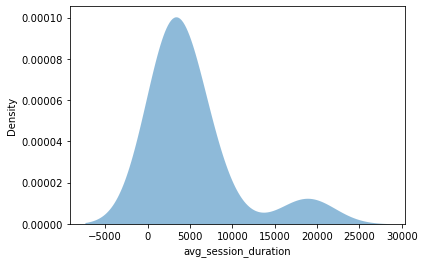

In [13]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),constrained_layout = True)
sns.kdeplot(data = morning_duration, x = 'avg_session_duration', fill =True, palette = "crest", alpha=0.5,linewidth=0)
#sns.kdeplot(data = evening_duration, x = 'avg_session_duration')

### Dropping all value with page views per session over 200 - outliers

In [14]:
apw_all_domains_morning = apw_all_domains_morning[apw_all_domains_morning.pageviews_per_session < 200]
apw_all_domains_evening = apw_all_domains_evening[apw_all_domains_evening.pageviews_per_session < 200]

#### Regression Line Plot (lmplot and regplot)

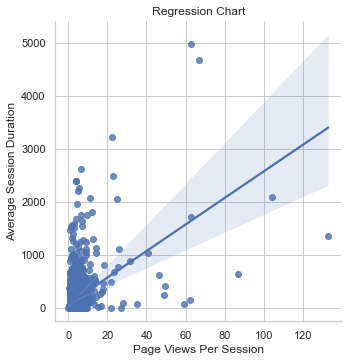

In [15]:
sns.set_theme(style="whitegrid")
sns.lmplot(x="pageviews_per_session", y="avg_session_duration",data = apw_all_domains_morning).set(title='Regression Chart',xlabel = 'Page Views Per Session',ylabel = 'Average Session Duration')


[Text(0.5, 1.0, 'Regression Chart'),
 Text(0.5, 0, 'Page Views Per Session'),
 Text(0, 0.5, 'Average Session Duration')]

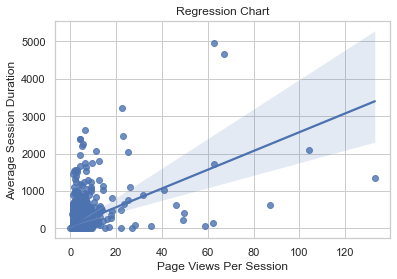

In [16]:
sns.regplot(x="pageviews_per_session", y="avg_session_duration",data = apw_all_domains_morning).set(title='Regression Chart',xlabel = 'Page Views Per Session',ylabel = 'Average Session Duration')


### Scatterplots 

[Text(0.5, 1.0, 'Session Duration & Page Views (Morning)'),
 Text(0.5, 0, 'Page Views Per Session'),
 Text(0, 0.5, 'Average Session Duration')]

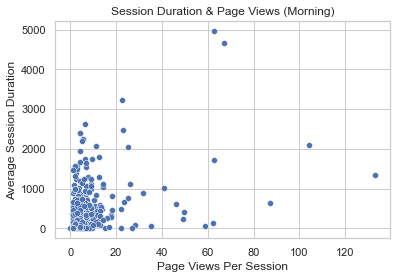

In [17]:
#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),constrained_layout = True)
sns.scatterplot(x="pageviews_per_session", y="avg_session_duration",data = apw_all_domains_morning).set(title='Session Duration & Page Views (Morning)',xlabel = 'Page Views Per Session',ylabel = 'Average Session Duration')


[Text(0.5, 1.0, 'Session Duration & Page Views (Evening)'),
 Text(0.5, 0, 'Page Views Per Session'),
 Text(0, 0.5, 'Average Session Duration')]

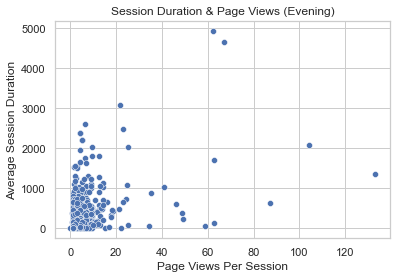

In [19]:
#same as above but evening
sns.scatterplot(x="pageviews_per_session", y="avg_session_duration",data = apw_all_domains_evening).set(title='Session Duration & Page Views (Evening)',xlabel = 'Page Views Per Session',ylabel = 'Average Session Duration')


### Correlation Matrix 


In [20]:
c_evening = apw_all_domains_evening.corr()
c_morning = apw_all_domains_morning.corr()

Text(492.42156250000005, 0.5, 'Variables')

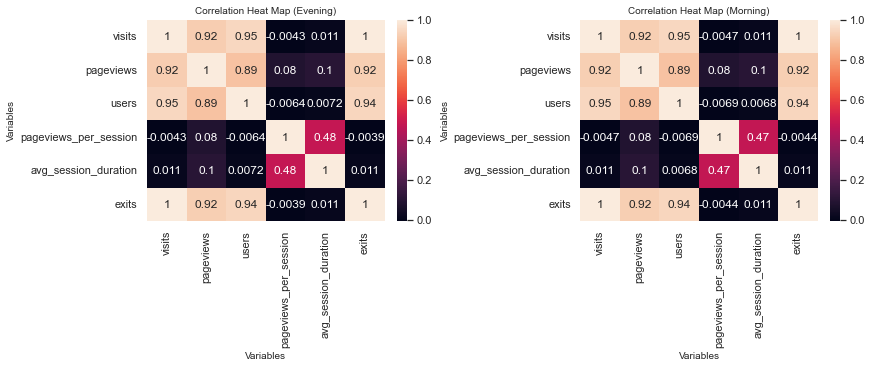

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),constrained_layout = True)
sns.heatmap(c_evening, annot= True, ax =ax[0])
ax[0].set_title("Correlation Heat Map (Evening)", fontdict={'fontsize':10})
ax[0].set_xlabel("Variables", fontdict={'fontsize':10})
ax[0].set_ylabel("Variables", fontdict={'fontsize':10})

sns.heatmap(c_morning, annot= True, ax =ax[1])
ax[1].set_title("Correlation Heat Map (Morning)", fontdict={'fontsize':10})
ax[1].set_xlabel("Variables", fontdict={'fontsize':10})
ax[1].set_ylabel("Variables", fontdict={'fontsize':10})

In [22]:
#get rid of duplicates in the heat map

In [23]:
mask1 = np.ones_like(c_evening, dtype = np.bool)
mask1 = np.triu(mask1)
mask2 = np.ones_like(c_morning, dtype = np.bool)
mask2 = np.triu(mask2)

C:\Users\jrippert\AppData\Local\Temp/ipykernel_29140/1989388507.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask1 = np.ones_like(c_evening, dtype = np.bool)
C:\Users\jrippert\AppData\Local\Temp/ipykernel_29140/1989388507.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.ones_like(c_morning, dtype = np.bool)


Text(492.4215624999998, 0.5, 'Variables')

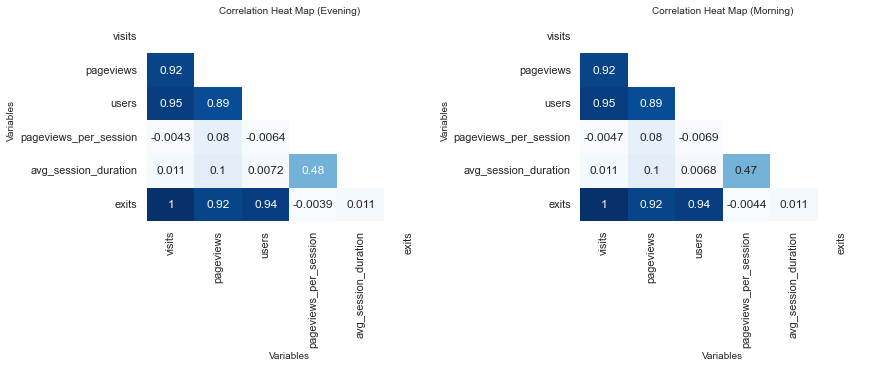

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),constrained_layout = True)
sns.set(style = "white")
sns.heatmap(c_evening, annot = True, mask = mask1, cmap = 'Blues', cbar= False, ax = ax[0])
ax[0].set_title("Correlation Heat Map (Evening)", fontdict={'fontsize':10})
ax[0].set_xlabel("Variables", fontdict={'fontsize':10})
ax[0].set_ylabel("Variables", fontdict={'fontsize':10})

sns.heatmap(c_morning, annot = True, mask = mask2, cmap = 'Blues', cbar= False, ax = ax[1])
ax[1].set_title("Correlation Heat Map (Morning)", fontdict={'fontsize':10})
ax[1].set_xlabel("Variables", fontdict={'fontsize':10})
ax[1].set_ylabel("Variables", fontdict={'fontsize':10})

# Departments Analysis

#### Questions: 

a) From what countries are the users interacting with the web pages? 

b) From what cities are the users interacting with the web pages? 

c) From what languages are the users interacting with the web pages? 

d) How are visitors interacting with the web pages? 


In [31]:
#start with question c: 
morn_lang = pd.read_csv('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/com-language.csv')
even_lang = pd.read_csv('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/com-language.csv')
#morn_lang = morn_lang.drop('date', axis=1)
#even_lang = even_lang.drop('date', axis=1)

In [33]:
morn_lang.sort_values(by='visits', ascending = False)
even_lang.sort_values(by='visits', ascending = False)
by_lang_morning = morn_lang.groupby('language')

#essentially find the median
#by_lang_morning['visits'].quantile(.5).sort_values(ascending = False)

In [34]:
# create our function for finding a range
def my_range(var):
    return np.max(var)-np.min(var)

In [35]:
#by_lang_morning.agg(my_range)

In [36]:
#morn_lang.visits.groupby(morn_lang.date).describe()

In [37]:
#morn_lang.visits.groupby(morn_lang.date).mean().head()


In [38]:
#morn_lang.visits.groupby(morn_lang.language).sum().sort_values(ascending = False).plot(kind='bar')

In [167]:
morn_lang = morn_lang.groupby(morn_lang.language)

In [168]:
values = morn_lang['visits'].agg(['mean',my_range,'max','min'])
values = values.sort_values(by='mean',ascending = False).head(10)

In [191]:
#labels = list(values.index)
x = np.arange(len(labels))
#
#fig, ax = plt.subplots()
#width = 0.35

#ax.barh(x,'mean', data=values,label='Mean',width=0.35)
#ax.barh(x+width,'my_range', data=values,label='Range')

#plt.yticks(x,labels)
#plt.xscale('log')
#ax.legend()

In [39]:
#ax = values.plot.barh()
#plt.xscale('log')
#plt.figure(figsize=(20,10))

In [40]:
test = pd.read_csv('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/com-language.csv')

by_date = test.groupby('date')
#by_date.sort_values(by='visits')
#by_date.plot.bar()
sample_date = by_date.get_group('2022-05-30')
#sample_date

In [307]:
#function to find the top date for each language
def top_date(group):
    return pd.DataFrame(group.sort_values(by='visits', ascending = False).iloc[:1])

In [41]:
#test to see if it works on entire DF
#top_date(sample_date)

In [42]:
#we can see that english language is top for each date
#by_date.apply(top_date).head()

In [44]:
#notice above we have an ugle extra index (2nd column)m lets drop it 
#maxlang_by_date = by_date.apply(top_date).reset_index(level=1,drop=True)
#maxlang_by_date = maxlang_by_date.drop(columns='date')
#maxlang_by_date.head()

In [45]:
#morn_lang.visits.mean().sort_values(ascending = False).head(10).plot(kind='bar')


In [46]:
#create function to normalize visits 
def visits_count(group):
    return group.visits.value_counts(normalize = True)
#visits_count(sample_date)

### Pivot Tables

In [47]:
#by_date.language.value_counts()
#test.pivot_table(values='visits',index = 'language', columns = 'date')

In [328]:
#pd.crosstab(test.language, test.)

# Countries 

In [68]:
#read in the json files of 3 depts, morning and evening
countries_initialeven_doc = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/DOC/com-top-countries-realtime.json'))
countries_initialmorn_doc = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/DOC/com-top-countries-realtime.json'))  

countries_initialeven_hhs = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/HHS/hhs-top-countries-realtime.json'))
countries_initialmorn_hhs = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/HHS/hhs-top-countries-realtime.json'))  

countries_initialeven_usps = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/USPS/pos-top-countries-realtime.json'))
countries_initialmorn_usps = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/USPS/pos-top-countries-realtime.json'))  


In [69]:
#take out just the data, not extra data set info
countries_evening_doc = pd.DataFrame.from_dict(countries_initialeven_doc['data'])
countries_morning_doc = pd.DataFrame.from_dict(countries_initialmorn_doc['data'])

countries_evening_hhs = pd.DataFrame.from_dict(countries_initialeven_hhs['data'])
countries_morning_hhs = pd.DataFrame.from_dict(countries_initialmorn_hhs['data'])

countries_evening_usps = pd.DataFrame.from_dict(countries_initialeven_usps['data'])
countries_morning_usps = pd.DataFrame.from_dict(countries_initialmorn_usps['data'])

## Data Cleansing and Sanity Checks

In [98]:
#check the shape and make sure only unique countries. Although not consistent number of countries, we will take top 10
print(countries_evening_doc.shape)
print(countries_evening_doc.country.nunique(),"\n")

print(countries_morning_doc.shape)
print(countries_morning_doc.country.nunique(),"\n")

print(countries_evening_hhs.shape)
print(countries_evening_hhs.country.nunique(),"\n")

print(countries_morning_hhs.shape)
print(countries_morning_hhs.country.nunique(),"\n")

print(countries_evening_usps.shape)
print(countries_evening_usps.country.nunique(),"\n")

print(countries_morning_usps.shape)
print(countries_morning_usps.country.nunique(),"\n")

(161, 2)
161 

(169, 2)
169 

(178, 2)
178 

(189, 2)
189 

(116, 2)
116 

(136, 2)
136 



In [83]:
#check the columns
print(countries_evening_doc.columns)
print(countries_morning_doc.columns)
print(countries_evening_hhs.columns)
print(countries_morning_hhs.columns)
print(countries_evening_usps.columns)
print(countries_morning_usps.columns)

Index(['country', 'active_visitors'], dtype='object')
Index(['country', 'active_visitors'], dtype='object')
Index(['country', 'active_visitors'], dtype='object')
Index(['country', 'active_visitors'], dtype='object')
Index(['country', 'active_visitors'], dtype='object')
Index(['country', 'active_visitors'], dtype='object')


In [82]:
#check the dtypes
print(countries_evening_doc.dtypes)
print(countries_morning_doc.dtypes)
print(countries_evening_hhs.dtypes)
print(countries_morning_hhs.dtypes)
print(countries_evening_usps.dtypes)
print(countries_morning_usps.dtypes)

#may have to turn into an int based on below

country            object
active_visitors    object
dtype: object
country            object
active_visitors    object
dtype: object
country            object
active_visitors    object
dtype: object
country            object
active_visitors    object
dtype: object
country            object
active_visitors    object
dtype: object
country            object
active_visitors    object
dtype: object


In [84]:
#make sure there are no nulls 
print(countries_evening_doc.isnull().sum(),"\n")
print(countries_morning_doc.isnull().sum(),"\n")
print(countries_evening_hhs.isnull().sum(),"\n")
print(countries_morning_hhs.isnull().sum(),"\n")
print(countries_evening_usps.isnull().sum(),"\n")
print(countries_morning_usps.isnull().sum(),"\n")


country            0
active_visitors    0
dtype: int64 

country            0
active_visitors    0
dtype: int64 

country            0
active_visitors    0
dtype: int64 

country            0
active_visitors    0
dtype: int64 

country            0
active_visitors    0
dtype: int64 

country            0
active_visitors    0
dtype: int64 



In [137]:
#ADD IN A COLUMN, DEPARTMENT IDENTIFIER FOR EACH DATA FIELD
countries_evening_doc['Department'] = 'DOC' 
countries_morning_doc['Department'] = 'DOC' 
countries_evening_hhs['Department'] = 'HHS' 
countries_morning_hhs['Department'] = 'HHS' 
countries_evening_usps['Department'] = 'USPS' 
countries_morning_usps['Department'] = 'USPS'

countries_evening_doc = countries_evening_doc.drop(['DOC'],axis=1)
countries_morning_doc = countries_morning_doc.drop(['DOC'],axis=1)
countries_evening_hhs = countries_evening_hhs.drop(['HHS'],axis=1)
countries_morning_hhs = countries_morning_hhs.drop(['HHS'],axis=1)
countries_evening_usps = countries_evening_usps.drop(['USPS'],axis=1)
countries_morning_usps = countries_morning_usps.drop(['USPS'],axis=1)

In [165]:
#check top values for each DF 
print(countries_evening_doc.head(),"\n")
print(countries_morning_doc.head(),"\n")
print(countries_evening_hhs.head(),"\n")
print(countries_morning_hhs.head(),"\n")
print(countries_evening_usps.head(),"\n")
print(countries_morning_usps.head(),"\n")

         country active_visitors Department
0  United States            8988        DOC
1          India             419        DOC
2          China             292        DOC
3         Mexico             228        DOC
4          Japan             191        DOC 

         country active_visitors Department
0  United States           29915        DOC
1         Mexico             644        DOC
2         Canada             584        DOC
3    Netherlands             503        DOC
4          India             435        DOC 

          country active_visitors Department
0           India            1023        HHS
1  United Kingdom             755        HHS
2           China             689        HHS
3           Spain             465        HHS
4         Germany             430        HHS 

          country active_visitors Department
0     Netherlands             311        HHS
1          Brazil             242        HHS
2          Canada             209        HHS
3  United Kingdo

In [157]:
#take the top 10 
countries_evening_doc = countries_evening_doc.head(10)
countries_morning_doc = countries_morning_doc.head(10)
countries_evening_hhs = countries_evening_hhs.head(10)
countries_morning_hhs = countries_morning_hhs.head(10)
countries_evening_usps = countries_evening_usps.head(10)
countries_morning_usps = countries_morning_usps.head(10)

#combine to create two date sets one for morning, one for afternoon
country_even = pd.concat([countries_evening_doc,countries_evening_hhs,countries_evening_usps],ignore_index=True)
country_morn = pd.concat([countries_morning_doc,countries_morning_hhs,countries_morning_usps],ignore_index=True)

#change to ints and str
country_even.active_visitors = country_even.active_visitors.astype('int32')
country_morn.active_visitors = country_morn.active_visitors.astype('int32')

country_even.country = country_even.country.astype('string')
country_morn.country = country_morn.country.astype('string')

Text(0.5, 1.0, 'Active Visitors by Country (Evening)')

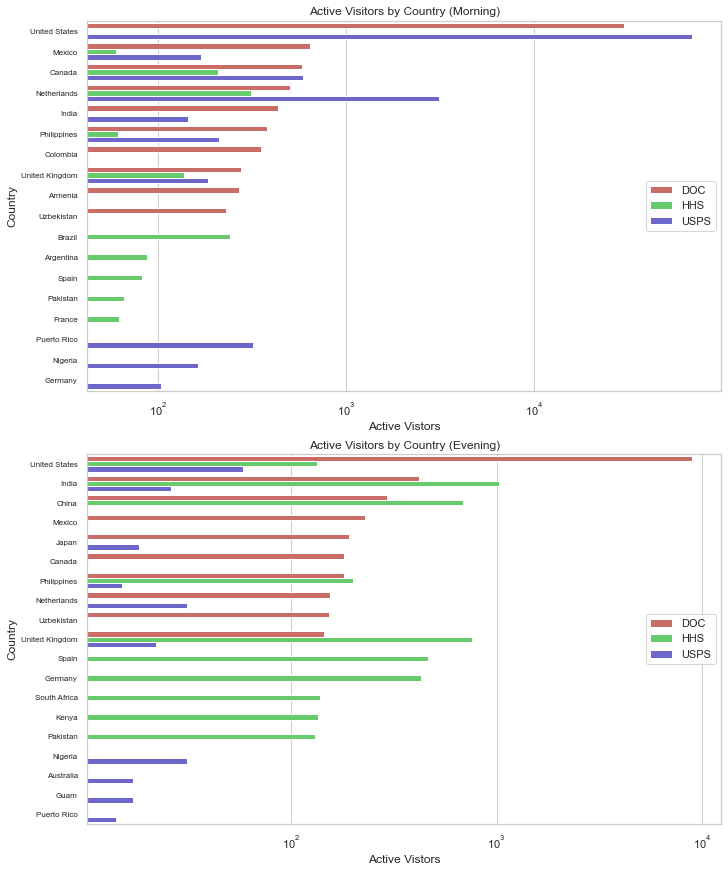

In [207]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12),constrained_layout = True)
#f, ax = plt.subplots(figsize=(10,10))

sns.set_theme(style = "whitegrid")

sns.barplot(x='active_visitors', y='country', hue = 'Department', data=country_morn, ax = ax[0], palette = 'hls')
ax[0].set(xscale="log")
ax[0].set(xlabel = 'Active Vistors', ylabel = 'Country')
ax[0].tick_params(axis='y', labelsize=8)
ax[0].legend(loc="center right")
ax[0].set_title('Active Visitors by Country (Morning)')

sns.barplot(x='active_visitors', y='country', hue = 'Department', data=country_even, ax = ax[1], palette = 'hls')
ax[1].set(xscale="log")
ax[1].set(xlabel = 'Active Vistors', ylabel = 'Country')
ax[1].tick_params(axis='y', labelsize=8)
ax[1].legend(loc="center right")
ax[1].set_title('Active Visitors by Country (Evening)')

Text(0.5, 1.0, 'Active Visitors by Country Scatter Plot (Evening)')

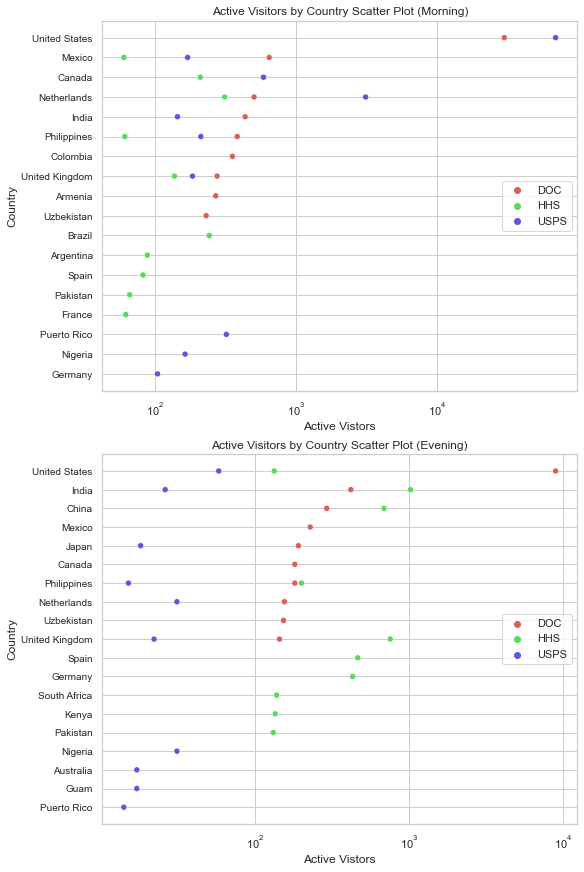

In [220]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 12),constrained_layout = True)

sns.set_theme(style = "whitegrid")

sns.scatterplot(x='active_visitors', y='country', hue = 'Department', data=country_morn, ax = ax[0], palette = 'hls')
ax[0].set(xscale="log")
ax[0].set(xlabel = 'Active Vistors', ylabel = 'Country')
ax[0].tick_params(axis='y', labelsize=10)
ax[0].legend(loc="center right")
ax[0].set_title('Active Visitors by Country Scatter Plot (Morning)')

sns.scatterplot(x='active_visitors', y='country', hue = 'Department', data=country_even, ax = ax[1], palette = 'hls')
ax[1].set(xscale="log")
ax[1].set(xlabel = 'Active Vistors', ylabel = 'Country')
ax[1].tick_params(axis='y', labelsize=10)
ax[1].legend(loc="center right")
ax[1].set_title('Active Visitors by Country Scatter Plot (Evening)')

In [221]:
#df.groupby('Town').Household.agg(town_max=('max'),town_min=('min'))
country_even.groupby('Department').active_visitors.agg(Dept_max=('max'),Dept_min=('min'), Dept_Avg=('mean'))

,Dept_max,Dept_min,Dept_Avg
Department,,,
DOC,8988,144,1093.2
HHS,1023,131,409.9
USPS,58,14,24.9


In [271]:
country_morn.groupby('Department').active_visitors.agg(Dept_max=('max'),Dept_min=('min'), Dept_Avg=('mean'))

,Dept_max,Dept_min,Dept_Avg
Department,,,
DOC,29915,230,3359.0
HHS,311,60,131.8
USPS,69207,104,7420.1


### Cities 

In [256]:
#read in the json files of 3 depts, morning and evening
cities_initialeven_doc = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/DOC/com-top-cities-realtime.json'))
cities_initialmorn_doc = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/DOC/com-top-cities-realtime.json'))  

cities_initialeven_hhs = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/HHS/hhs-top-cities-realtime.json'))
cities_initialmorn_hhs = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/HHS/hhs-top-cities-realtime.json'))  

cities_initialeven_usps = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Evening/USPS/pos-top-cities-realtime.json'))
cities_initialmorn_usps = json.load(open('C:/Users/jrippert/Desktop/MIDS/Project2_Mazzulla_Rippert_Tang/Julians_Data/Morning/USPS/pos-top-cities-realtime.json'))  


In [257]:
cities_evening_doc = pd.DataFrame.from_dict(cities_initialeven_doc['data'])
cities_morning_doc = pd.DataFrame.from_dict(cities_initialmorn_doc['data'])

cities_evening_hhs = pd.DataFrame.from_dict(cities_initialeven_hhs['data'])
cities_morning_hhs = pd.DataFrame.from_dict(cities_initialmorn_hhs['data'])

cities_evening_usps = pd.DataFrame.from_dict(cities_initialeven_usps['data'])
cities_morning_usps = pd.DataFrame.from_dict(cities_initialmorn_usps['data'])

## Data Cleansing and Sanity Checks


In [258]:
#check the shape and unique number of cities (rows), will take 10
print(cities_evening_doc.shape)
print(cities_evening_doc.city.nunique(),"\n")

print(cities_morning_doc.shape)
print(cities_morning_doc.city.nunique(),"\n")

print(cities_evening_hhs.shape)
print(cities_evening_hhs.city.nunique(),"\n")

print(cities_morning_hhs.shape)
print(cities_morning_hhs.city.nunique(),"\n")

print(cities_evening_usps.shape)
print(cities_evening_usps.city.nunique(),"\n")

print(cities_morning_usps.shape)
print(cities_morning_usps.city.nunique(),"\n")

(2834, 2)
2834 

(4774, 2)
4774 

(5195, 2)
5195 

(7903, 2)
7903 

(2403, 2)
2403 

(5167, 2)
5167 



In [259]:
#check the columns, look good
print(cities_evening_doc.columns)
print(cities_morning_doc.columns)
print(cities_evening_hhs.columns)
print(cities_morning_hhs.columns)
print(cities_evening_usps.columns)
print(cities_morning_usps.columns)


Index(['city', 'active_visitors'], dtype='object')
Index(['city', 'active_visitors'], dtype='object')
Index(['city', 'active_visitors'], dtype='object')
Index(['city', 'active_visitors'], dtype='object')
Index(['city', 'active_visitors'], dtype='object')
Index(['city', 'active_visitors'], dtype='object')


In [260]:
#check the dtypes
print(cities_evening_doc.dtypes)
print(cities_morning_doc.dtypes)
print(cities_evening_hhs.dtypes)
print(cities_morning_hhs.dtypes)
print(cities_evening_usps.dtypes)
print(cities_morning_usps.dtypes)

city               object
active_visitors    object
dtype: object
city               object
active_visitors    object
dtype: object
city               object
active_visitors    object
dtype: object
city               object
active_visitors    object
dtype: object
city               object
active_visitors    object
dtype: object
city               object
active_visitors    object
dtype: object


In [261]:
#make sure there are no nulls 
print(cities_evening_doc.isnull().sum(),"\n")
print(cities_morning_doc.isnull().sum(),"\n")
print(cities_evening_hhs.isnull().sum(),"\n")
print(cities_morning_hhs.isnull().sum(),"\n")
print(cities_evening_usps.isnull().sum(),"\n")
print(cities_morning_usps.isnull().sum(),"\n")


city               0
active_visitors    0
dtype: int64 

city               0
active_visitors    0
dtype: int64 

city               0
active_visitors    0
dtype: int64 

city               0
active_visitors    0
dtype: int64 

city               0
active_visitors    0
dtype: int64 

city               0
active_visitors    0
dtype: int64 



In [262]:
#add a dept identifier columns
cities_evening_doc['Department'] = 'DOC' 
cities_morning_doc['Department'] = 'DOC' 
cities_evening_hhs['Department'] = 'HHS' 
cities_morning_hhs['Department'] = 'HHS' 
cities_evening_usps['Department'] = 'USPS' 
cities_morning_usps['Department'] = 'USPS'

In [265]:
#dropping rows which don't make sense
cities_evening_doc = cities_evening_doc[cities_evening_doc['city'] != 'zz']
cities_morning_doc = cities_morning_doc[cities_morning_doc['city'] != 'zz']
cities_evening_hhs = cities_evening_hhs[cities_evening_hhs['city'] != 'zz']
cities_morning_hhs = cities_morning_hhs[cities_morning_hhs['city'] != 'zz']
cities_evening_usps = cities_evening_usps[cities_evening_usps['city'] != 'zz']
cities_morning_usps = cities_morning_usps[cities_morning_usps['city'] != 'zz']

cities_evening_doc = cities_evening_doc[cities_evening_doc['city'] != '(not set)']
cities_morning_doc = cities_morning_doc[cities_morning_doc['city'] != '(not set)']
cities_evening_hhs = cities_evening_hhs[cities_evening_hhs['city'] != '(not set)']
cities_morning_hhs = cities_morning_hhs[cities_morning_hhs['city'] != '(not set)']
cities_evening_usps = cities_evening_usps[cities_evening_usps['city'] != '(not set)']
cities_morning_usps = cities_morning_usps[cities_morning_usps['city'] != '(not set)']


In [266]:
#taking only top 10 values, to analyze 

cities_evening_doc = cities_evening_doc.head(10) 
cities_morning_doc = cities_morning_doc.head(10)
cities_evening_hhs = cities_evening_hhs.head(10)
cities_morning_hhs = cities_morning_hhs.head(10) 
cities_evening_usps = cities_evening_usps.head(10)
cities_morning_usps = cities_morning_usps.head(10)

print(cities_evening_usps.head(10))
print(cities_morning_usps.head(10))


             city active_visitors Department
1     Los Angeles             771       USPS
2        New York             365       USPS
3         Chicago             308       USPS
4          Dallas             256       USPS
5         Seattle             234       USPS
7         Phoenix             114       USPS
8   San Francisco             103       USPS
9       Las Vegas              97       USPS
10        Houston              90       USPS
11      San Diego              88       USPS
            city active_visitors Department
1       New York            2275       USPS
2        Chicago            2265       USPS
3    Los Angeles            2249       USPS
4         Dallas            1506       USPS
5        Seattle             766       USPS
7        Houston             586       USPS
8     Pittsburgh             565       USPS
9   Philadelphia             551       USPS
10        Austin             484       USPS
11       Phoenix             457       USPS


In [267]:
#add them all together for final evening and morning analysis
city_even = pd.concat([cities_evening_doc,cities_evening_hhs,cities_evening_usps],ignore_index=True)
city_morn = pd.concat([cities_morning_doc,cities_morning_hhs,cities_morning_usps],ignore_index=True)


In [268]:
#turning to int and string
city_even.active_visitors = city_even.active_visitors.astype('int32')
city_morn.active_visitors = city_morn.active_visitors.astype('int32')

city_even.city = city_even.city.astype('string')
city_morn.city = city_morn.city.astype('string')

Text(0.5, 1.0, 'Active Visitors by City (Evening)')

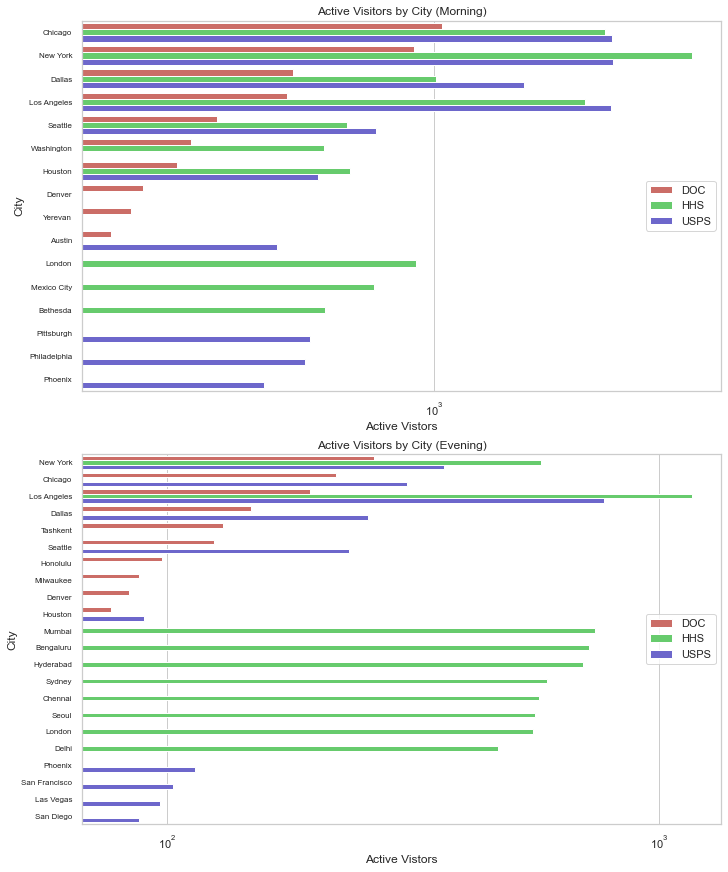

In [269]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12),constrained_layout = True)
#f, ax = plt.subplots(figsize=(10,10))

sns.set_theme(style = "whitegrid")

sns.barplot(x='active_visitors', y='city', hue = 'Department', data=city_morn, ax = ax[0], palette = 'hls')
ax[0].set(xscale="log")
ax[0].set(xlabel = 'Active Vistors', ylabel = 'City')
ax[0].tick_params(axis='y', labelsize=8)
ax[0].legend(loc="center right")
ax[0].set_title('Active Visitors by City (Morning)')

sns.barplot(x='active_visitors', y='city', hue = 'Department', data=city_even, ax = ax[1], palette = 'hls')
ax[1].set(xscale="log")
ax[1].set(xlabel = 'Active Vistors', ylabel = 'City')
ax[1].tick_params(axis='y', labelsize=8)
ax[1].legend(loc="center right")
ax[1].set_title('Active Visitors by City (Evening)')

Text(0.5, 1.0, 'Active Visitors by City Scatter Plot (Evening)')

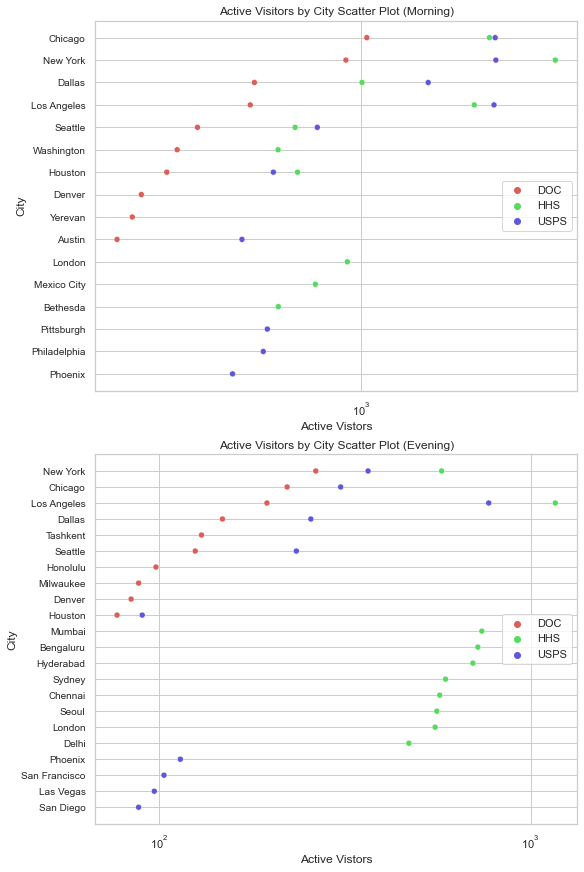

In [270]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 12),constrained_layout = True)

sns.set_theme(style = "whitegrid")

sns.scatterplot(x='active_visitors', y='city', hue = 'Department', data=city_morn, ax = ax[0], palette = 'hls')
ax[0].set(xscale="log")
ax[0].set(xlabel = 'Active Vistors', ylabel = 'City')
ax[0].tick_params(axis='y', labelsize=10)
ax[0].legend(loc="center right")
ax[0].set_title('Active Visitors by City Scatter Plot (Morning)')

sns.scatterplot(x='active_visitors', y='city', hue = 'Department', data=city_even, ax = ax[1], palette = 'hls')
ax[1].set(xscale="log")
ax[1].set(xlabel = 'Active Vistors', ylabel = 'City')
ax[1].tick_params(axis='y', labelsize=10)
ax[1].legend(loc="center right")
ax[1].set_title('Active Visitors by City Scatter Plot (Evening)')

In [272]:
city_even.groupby('Department').active_visitors.agg(Dept_max=('max'),Dept_min=('min'), Dept_Avg=('mean'))

,Dept_max,Dept_min,Dept_Avg
Department,,,
DOC,264,77,143.0
HHS,1165,470,664.1
USPS,771,88,242.6


In [273]:
city_morn.groupby('Department').active_visitors.agg(Dept_max=('max'),Dept_min=('min'), Dept_Avg=('mean'))

,Dept_max,Dept_min,Dept_Avg
Department,,,
DOC,1036,226,471.6
HHS,3268,603,1268.8
USPS,2275,457,1170.4
